## Final Project Submission

Please fill out:
* Student name: Miya Kusumoto
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: TBD


In [138]:
#import statements

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import kurtosis
from scipy.stats import skew

import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms


## Obtain & Explore

Let's begin by importing our dataset, checking to make sure it was imported correctly, and performing some basic exploration so we get a good understanding of what our data currently looks like and what we will need to do to clean it and model it.

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Our data looks like it was imported properly. Let's take a look at the column descriptions we were provided with and get a good foundation of what we are working with. 
* id - unique identified for a house
* dateDate - house was sold
* pricePrice - is prediction target
* bedroomsNumber - of Bedrooms/House
* bathroomsNumber - of bathrooms/bedrooms
* sqft_livingsquare - footage of the home
* sqft_lotsquare - footage of the lot
* floorsTotal - floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15 - lotSize area in 2015 (implies-- some renovations)

Seems reasonable. Let's explore and start seeing where we need to clean it up. 

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Columns: 465 entries, id to zipcode_98199
dtypes: float32(1), float64(16), int64(1), uint8(447)
memory usage: 12.9 MB


Well, at first glance it seems that the only columns that have null values are waterfront, view, and yr_renovated. I imagine there are likely some columns that have hidden NaN values and columns we need to update the datatype for.

Let's take a look at our low hanging fruit columns firt. Waterfront, view, and yr_renovated.

## Waterfront


In [137]:
df["waterfront"].isna().sum()

KeyError: 'waterfront'

In [4]:
df["waterfront"].unique()

array([nan,  0.,  1.])

In [5]:
df["waterfront"].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

We have 2376 null values. Out of our 21000+ values it is probably ok to drop these rows. Perhaps we could also assume that majority of these properties with null values do not have a waterfront view (look at those value counts!). 

Going to go ahead and reclassify the null values as 0 and also going to change this column to categorical.


In [6]:
df["waterfront"].fillna(0.0, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df["waterfront"] = df["waterfront"].astype("str")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


Great! We fixed the waterfront variable. Next let's look at view. We will repeat the same process.

## View

In [8]:
df["view"].isna().sum()

63

In [9]:
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [10]:
df["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Ok so there are only 63 null values. Let's just convert them to 0s and the column to categorical.

In [11]:
df["view"].fillna(0.0, inplace = True)
df["view"] = df["view"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(4)
memory usage: 3.5+ MB


## Year Renovated

In [12]:
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [13]:
df["yr_renovated"].isna().sum()

3842

In [14]:
#assuming that the 3842 homes that are marked as null values are not renovated. Let's change these values to 0s. 
df["yr_renovated"].fillna(0.0, inplace = True)

In [36]:
#Convert from integer to date object

import datetime

#test first
s = "1976"
s_datetime = datetime.datetime.strptime(s, '%Y')
s_datetime


datetime.datetime(1976, 1, 1, 0, 0)

In [15]:
df["yr_renovated"] = df["yr_renovated"].astype("int")
df["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001,
       1980, 1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008,
       1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965,
       1934, 1972, 1944, 1958])

Leaving the yr_renovated column as an integer until I decide what I will need to be doing with this column. Perhaps will want to create a new categorical variable with houses being renovated in the past 5, 10 , 15, 20 + years, or never.

In [16]:
df.info()
#might still need to fix condition, grade, sqft_basement, zipcode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(12), object(4)
memory usage: 3.5+ MB


In [17]:
#sqft_basement should be an int. But after looking at the unique values there is a hidden null value... the '?'
#I wonder how many there are
df["sqft_basement"].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [21]:
df["sqft_basement"].value_counts()
#454 with the ?. Replacing these with 0s. 

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
666.0         1
1930.0        1
1008.0        1
588.0         1
276.0         1
915.0         1
2196.0        1
768.0         1
1816.0        1
143.0         1
2350.0        1
506.0         1
2250.0        1
1880.0        1
3000.0        1
516.0         1
295.0         1
2500.0        1
1024.0        1
652.0         1
1960.0        1
2720.0        1
374.0         1
274.0         1
2850.0        1
1245.0        1
508.0         1
4820.0        1
906.0         1
2400.0        1
Name: sqft_basement, Len

In [25]:
df["sqft_basement"] = df["sqft_basement"].replace("?", 0)

In [26]:
df["sqft_basement"] = df["sqft_basement"].astype("float32")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float32
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float32(1), float64(5), int64(12), object(3)
memory usage: 3.4+ MB


In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,285.716583,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,439.819855,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Next need to check out my bedrooms variable because 33 bedrooms could possibly be a placeholder value. I also want to go ahead and change zipcode to a categorical variable. 

In [29]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [30]:
#drop the house with 33 bedrooms. That seems to be a placeholder. 
df.drop(df[df.bedrooms == 33].index, inplace=True)

In [31]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [32]:
df["zipcode"] = df["zipcode"].astype("str")

In [34]:
df["zipcode"].value_counts() #Ok there are 70 zipcodes. Instead of a countplot for each zipcode, let's use a histogram. 

98103    601
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Ok zipcode looks good. There are no zeros and the column is categorical. Let's look at the yr_built column now to make sure that the years look normal and that there are no placeholder values. 

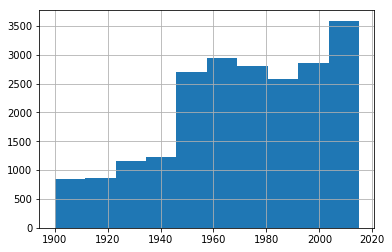

In [36]:
df.yr_built.hist()

Everything looks good here. There is a big jump in the 1940s - 1950s and another from 2008 - 2015. I would hypothesize that most of these houses were built in 2013 - 2015 following the recession and the financial crisis recovery. 

In [37]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,3.409752,7.657946,1788.631506,285.702942,1971.000787,68.761391,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.650471,1.173218,827.763251,439.825470,29.375460,364.045627,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Checking for Multicollinearity

Before one-hot encoding our categorical variables, we want to check for multicollinearity. We want to make sure that the columns within the dataset are not highly correlated.

We'll do this by creating a correlation heatmap. We want to do this before one-hot-encoding our data because each column becomes both a row and a column in the visualization, and after one-hot encoding, this dataset will contain a lot of coulumns.



In [85]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

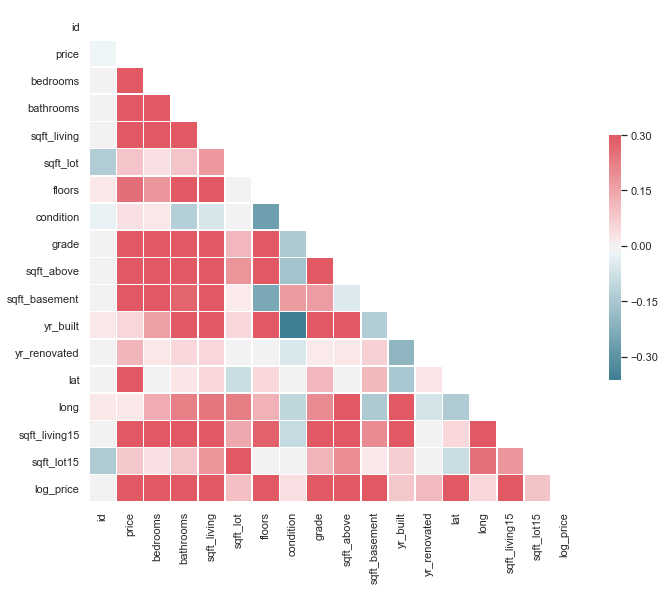

In [89]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

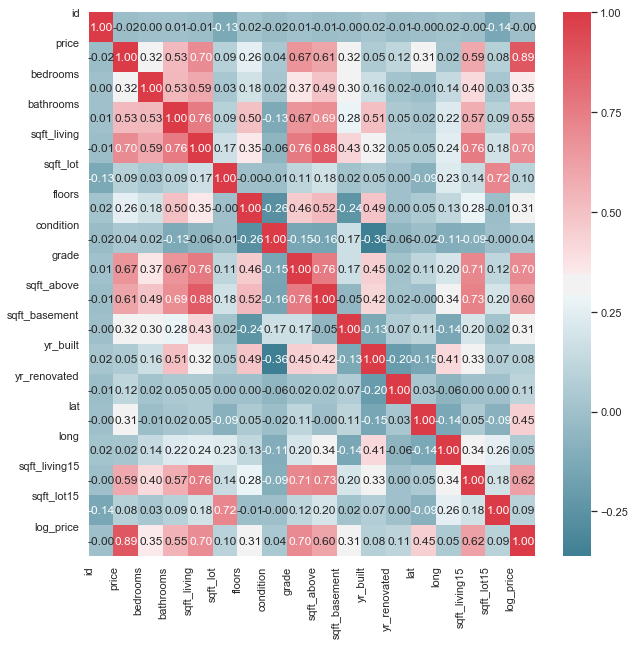

In [91]:
heatMap(df)

## Normalizing our Data and One-Hot Encoding
We normalize our dataset by converting each numeric value to it's corresponding z-score for the column, which is obtained by subtracting the column's mean and then dividing by the column's standard deviation for every value.

In [95]:
df.describe().columns
for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'log_price'] :
    df[column] = (df[column] - df[column].mean()) / df[column].std()

In [98]:
#one hot encode categorical variables
df = pd.get_dummies(df)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,-0.411263,-1.451035,-0.980636,-0.228182,-0.915570,-0.629931,-0.560804,-0.735272,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,-0.411263,0.174457,0.533324,-0.189741,0.937363,-0.629931,-0.560804,0.460722,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,-1.517318,-1.451035,-1.427199,-0.123144,-0.915570,-0.629931,-1.413161,-1.230583,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,0.694793,1.149752,-0.131075,-0.243877,-0.915570,2.444765,-0.560804,-0.892322,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,-0.411263,-0.150642,-0.436046,-0.169506,-0.915570,-0.629931,0.291552,-0.131235,...,0,0,0,0,0,0,0,0,0,0


# Visualizing KDEs and Probability Densities

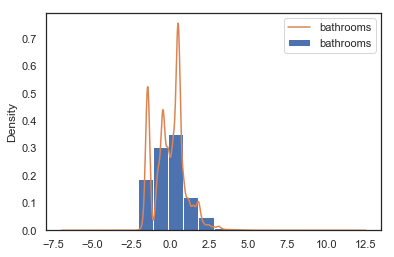

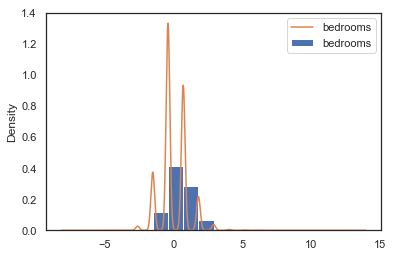

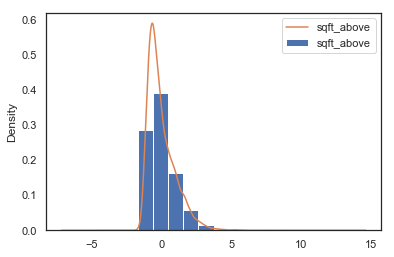

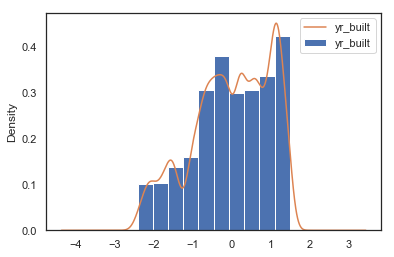

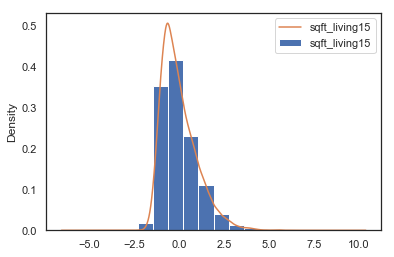

In [100]:
for column in ['bathrooms',
       'bedrooms', 'sqft_above', 'yr_built', 'sqft_living15']:
    df[column].plot.hist(density=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show();

A number of our data is multimodal meaning they have more than one typical value. We may need to generate separate plots while fine tuning the number of bins to view the data in a better way

## Build joint plots to check for the linearity assumption between predictors and target variable

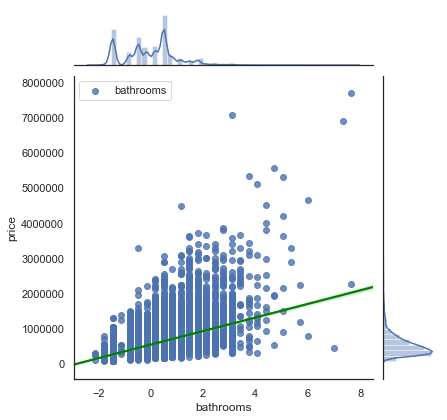

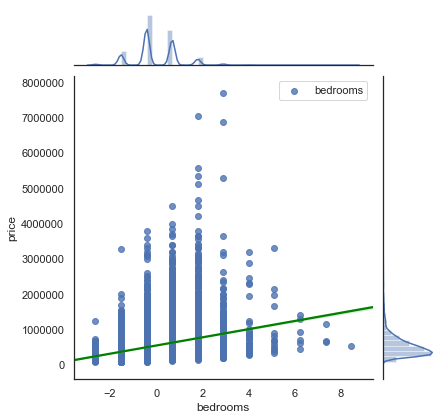

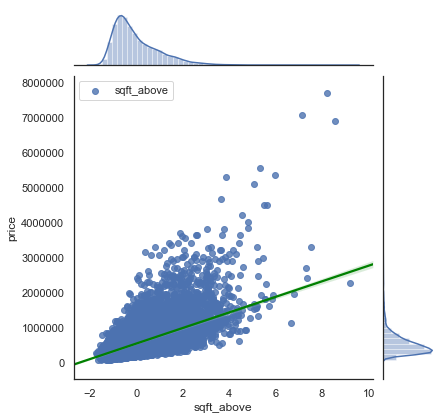

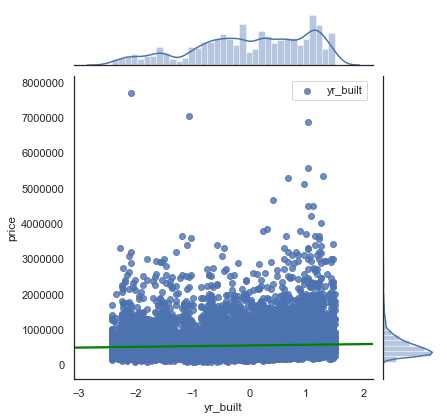

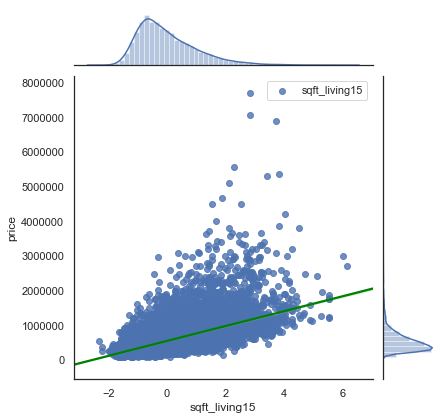

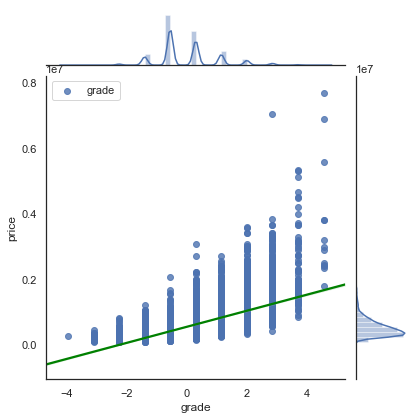

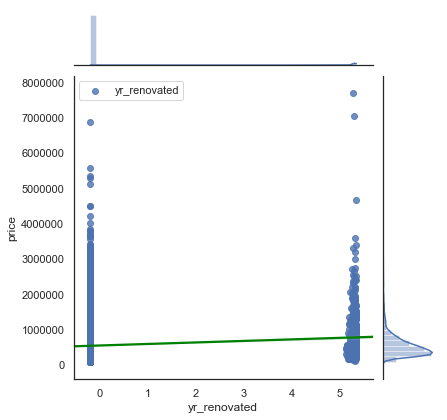

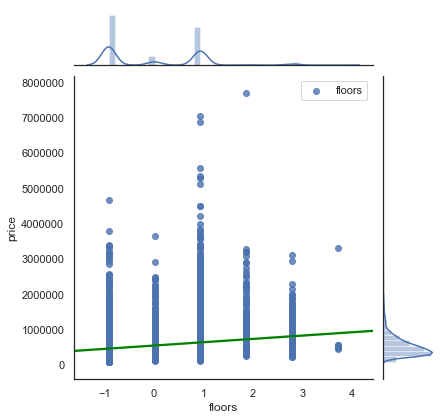

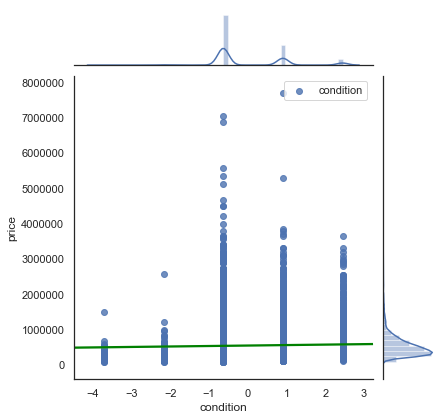

In [101]:
for column in ['bathrooms','bedrooms', 'sqft_above', 'yr_built', 'sqft_living15', 'grade', 'yr_renovated', 'floors', 'condition']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show();

Bathrooms, Bedrooms, Sqft_above, and grade all seem to have a reasonably strong linear relationship with price. Condition, year built, renovation year, and floor all don't seem to have too much of an impact. 



## Exploration of Price (Our Dependent variable)
We know our Price has a mean value of 540,000. With a minimum of 78,000 and a maximum of 770,000. Find the median and mode next so we can understand a bit better what we are looking at. 

In [38]:
df["price"].median()

450000.0

In [39]:
df["price"].mode()

0    350000.0
1    450000.0
dtype: float64

In [40]:
df["price"].mean()

540291.9567512502

Our mean is 540,000, our median is 450,000, and we have two modes at 350,000 and 450,000. Let's take a look at our distribution.

/Users/miyakusumoto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


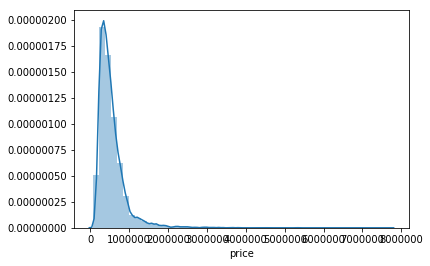

In [41]:
sns.distplot(df['price'])

Ok long right tail so the data is positively skewed. Also, recall that a tall skinny distribution is Leptokurtic which means the presence of outliers makes the bulk of the data appear tall and skinny. Now let's see how each of our values relate to each other? 

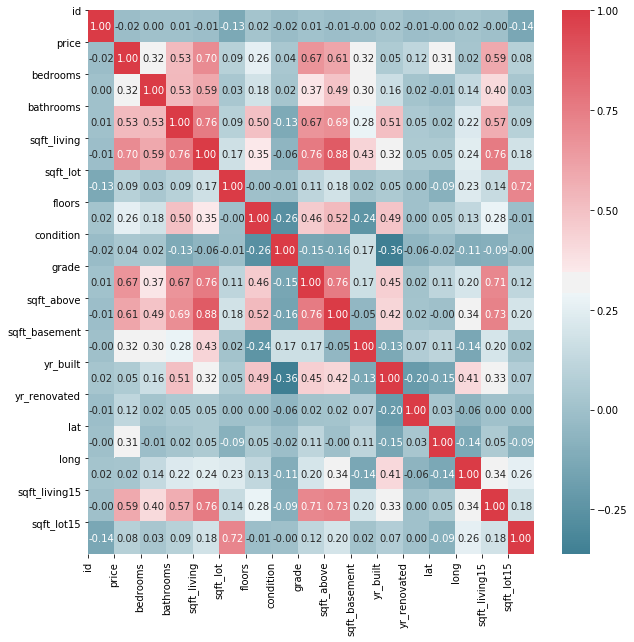

The highest correlations seem to be: 
 - sqft_living15 and sqft_living at .76
 - sqft_lot15 and sqft_lot at .72
 - grade and sqft_living at .76
 - sqft_above and sqft_living at .88
 
This makes sense becuase the sqft living is basically the sqft above and the sqft lots 15 and original all should be highly correlated.
 
Initially I am interested in Bathrooms, Sqft_living, sqft_above, and grade. Going to start by normalizing my values. 

kurtosis:  1.2785847335386
skew:  0.5196082226582799


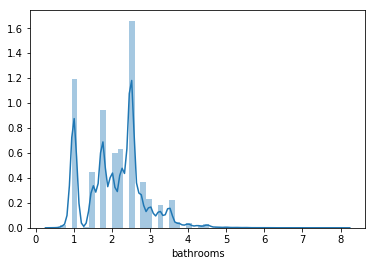

In [54]:
sns.distplot(df["bathrooms"])
print("kurtosis: ", kurtosis(df["bathrooms"]))
print("skew: ", skew(df["bathrooms"]))

/Users/miyakusumoto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


kurtosis:  5.250278624437211
skew:  1.4730409364724821


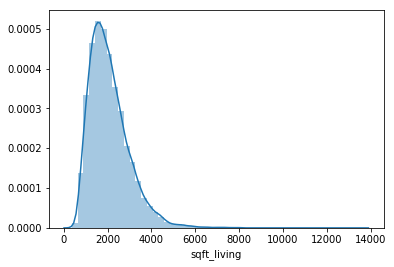

In [55]:
sns.distplot(df["sqft_living"])
print("kurtosis: ", kurtosis(df["sqft_living"]))
print("skew: ", skew(df["sqft_living"]))

/Users/miyakusumoto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


kurtosis:  1.1344499650140643
skew:  0.788111122703391


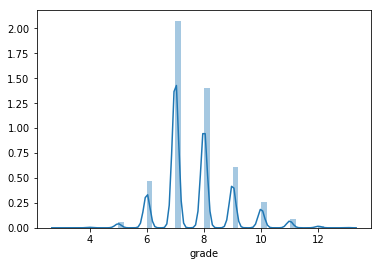

In [56]:
sns.distplot(df["grade"])
print("kurtosis: ", kurtosis(df["grade"]))
print("skew: ", skew(df["grade"]))

/Users/miyakusumoto/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


kurtosis:  3.4043687408782395
skew:  1.4472910400607721


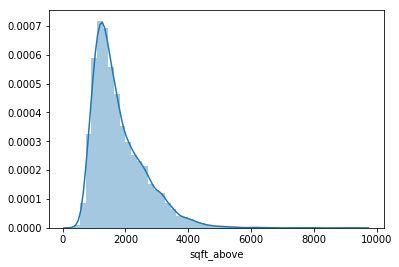

In [57]:
sns.distplot(df["sqft_above"])
print("kurtosis: ", kurtosis(df["sqft_above"]))
print("skew: ", skew(df["sqft_above"]))

In [73]:
df.describe().columns.drop(['price'])

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [74]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Housing: price~id
------------------------------
['id', 0.0002809841559425763, 550097.4056056184, -2.140658873205561e-06, 0.013763061291608298]
Housing: price~bedrooms
------------------------------
['bedrooms', 0.09983105754468735, 107393.53407124468, 128386.85951546872, 0.0]
Housing: price~bathrooms
------------------------------
['bathrooms', 0.276586853285093, 8692.164522945772, 251247.25182245873, 0.0]
Housing: price~sqft_living
------------------------------
['sqft_living', 0.4927041609539142, -44011.54263376336, 280.8688052542452, 0.0]
Housing: price~sqft_lot
------------------------------
['sqft_lot', 0.008078277097040565, 528252.6970166971, 0.7973109398516637, 5.561298404804029e-40]
Housing: price~floors
------------------------------
['floors', 0.06595675140472601, 279084.5386316283, 174823.67129610287, 0.0]
Housing: price~condition
------------------------------
['condition', 0.0012982114655466503, 470904.8852235544, 20349.595946495978, 1.1815140111165242e-07]
Housing: price

In [75]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,id,0.000280984,550097,-2.14066e-06,0.0137631
2,bedrooms,0.0998311,107394,128387,0
3,bathrooms,0.276587,8692.16,251247,0
4,sqft_living,0.492704,-44011.5,280.869,0
5,sqft_lot,0.00807828,528253,0.797311,5.5613e-40
6,floors,0.0659568,279085,174824,0
7,condition,0.00129821,470905,20349.6,1.18151e-07
8,grade,0.446176,-1.06147e+06,209163,0
9,sqft_above,0.366499,59716,268.684,0


In general, the higher the R-squared, the better the model fits your data. The highest r-squared values are in our independent variables:
 - sqft_living with an r-sq value of .493 which means that 49.3% of the variation in price can be explained by the change in sqft. 
 - grade with an r-sq value of .446 which means that 44.6% of the variation in the price can be explained by the grade
 - bathrooms with an r-sq value of .276 which means that 27.6% of the variation in the price can be explained by the change in bathrooms. 
 - sqft_basement with an r-sq value of .103 which means 10.3% of the variation in the price can be explained by the change in basement sqft. 
 
 Let's take a look at our histograms again. Might need to consider taking log transformations to make sure certain data is less skewed. 

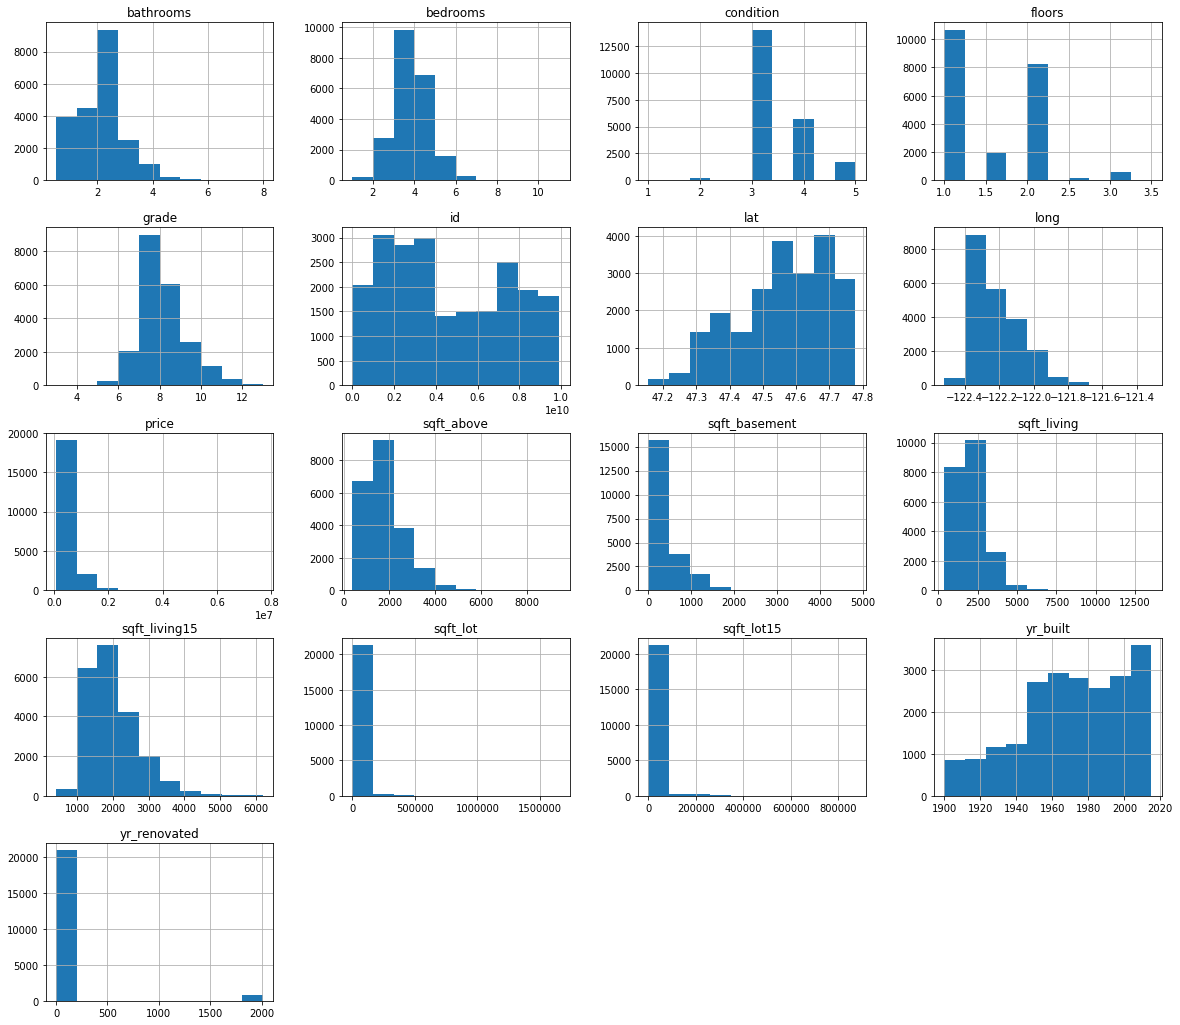

In [76]:
df.hist(figsize = (20,18));

In [77]:
np.log(df["price"]).describe()

count    21596.000000
mean        13.048196
std          0.526562
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

In [80]:
df["log_price"] = np.log(df["price"])

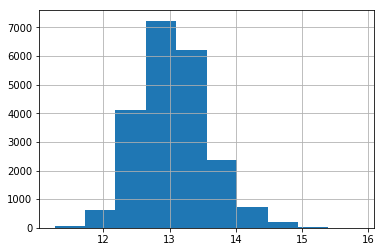

In [81]:
df["log_price"].hist();

In [83]:
col_names = df.describe().columns.drop(['price'], ["log_price"])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Log_Price~" + val)
    print ("------------------------------")

    f = 'log_price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results_log[idx+1])

Housing: Log_Price~id
------------------------------
['id', 1.3909913287868392e-05, 13.051323077525065, -6.82665372137641e-13, 0.5836531868102588]
Housing: Log_Price~bedrooms
------------------------------
['bedrooms', 0.12311072078241969, 12.35916276725256, 0.20435006959391872, 0.0]
Housing: Log_Price~bathrooms
------------------------------
['bathrooms', 0.3038990541877733, 12.24951605180388, 0.37747599692561207, 0.0]
Housing: Log_Price~sqft_living
------------------------------
['sqft_living', 0.48331566140862225, 12.218727535882014, 0.0003987171709908483, 0.0]
Housing: Log_Price~sqft_lot
------------------------------
['sqft_lot', 0.010006376255865534, 13.028990917082616, 1.2718792371564601e-06, 3.764072324702763e-49]
Housing: Log_Price~floors
------------------------------
['floors', 0.0965124539748039, 12.59531239804665, 0.3031107924833689, 0.0]
Housing: Log_Price~condition
------------------------------
['condition', 0.0015097072695106073, 12.940947553314112, 0.03145346942304761

In [84]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,id,0.000280984,550097,-2.14066e-06,0.0137631
2,bedrooms,0.0998311,107394,128387,0
3,bathrooms,0.276587,8692.16,251247,0
4,sqft_living,0.492704,-44011.5,280.869,0
5,sqft_lot,0.00807828,528253,0.797311,5.5613e-40
6,floors,0.0659568,279085,174824,0
7,condition,0.00129821,470905,20349.6,1.18151e-07
8,grade,0.446176,-1.06147e+06,209163,0
9,sqft_above,0.366499,59716,268.684,0


While this made our price distribution more normal, it didn't change our r-sqaured values very much. Let's just continue with the regular price. 

IMPORTANT: remember that we made dummies for Type, Dept and Store columns. You'll need to drop 1 column for each of these if you want good results. The reason for this is that singularity will occur and . This is related to what we mentioned earlier on in section 11. Don't worry about the "why" for now, just make sure to drop 1 column and you should be fine! The parameter value for the dropper "base category" will be absorbed in the intercept.

In [127]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=465)

In [130]:
df.columns[396:465]

Index(['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', '

In [131]:
cols_date= df.columns[18:388]
cols_water = df.columns[389]
cols_view = df.columns[390:395]
cols_zip = df.columns[396:465] 

cols = [cols_water, cols_view , cols_zip, cols_date]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df).fit()
    print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)